In [1]:
import torch
import torch.nn as nn
from Network import *

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
#Hyperparams
in_seq_len = 3
out_seq_length = 1
batch_size = 10
dec_hidden_size = 5

enc = LSTMEncoder(batch_size, in_seq_len, dec_hidden_size)      
dec = LSTMDecoder(batch_size, out_seq_length, dec_hidden_size)    
params = list(enc.parameters()) + list(dec.parameters())
optimizer = torch.optim.Adam(params, lr=0.01)    

In [3]:
#Generate sigmoid training data
def get_data(batch_size, input_sequence_length, output_sequence_length, offset=0):
    length = input_sequence_length + output_sequence_length
    t = torch.zeros(batch_size,1).uniform_(0,20 - length).int()
    
    a = torch.arange(0 ,batch_size).unsqueeze(-1).float().uniform_(0,20 - input_sequence_length)
    s = torch.arange(-10, -10 + length).unsqueeze(0).repeat(batch_size,1) + a #+ offset
    s = torch.sigmoid(s.float())
    
    return s[:, :input_sequence_length].unsqueeze(-1).transpose(1, 0), s[:,-output_sequence_length:]


<IPython.core.display.Javascript object>


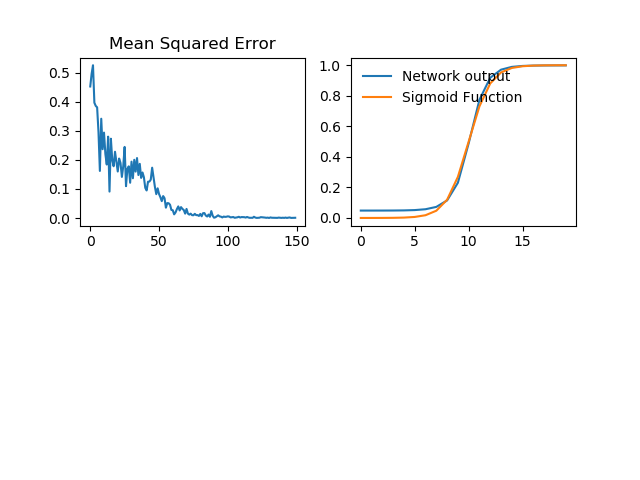

In [4]:
fig = plt.figure()
ax = fig.add_subplot(222)
ax1 = fig.add_subplot(221)
plt.ion()

fig.show()
fig.canvas.draw()

losses = []

for e in range(150):
    out = []
    enc.reset(batch_size)
    dec.reset(batch_size)
    optimizer.zero_grad()
    X, Y = get_data(batch_size, in_seq_len, 1, offset = 0)

    enc_out = enc(X)
    dec_out = dec(enc_out)

    loss = torch.mean((dec_out - Y) ** 2)
    loss.backward()
    optimizer.step()

    #Track losses and draw graph
    losses.append(loss)
    ax1.clear()
    ax1.plot(losses)
    ax1.set_title("Mean Squared Error")
    
    #Draw comparison graph
    net_out = []
    for i in range(-13,7):
        X = torch.sigmoid(torch.arange(i,i+3).float()).unsqueeze(-1).unsqueeze(-1)#.numpy().tolist()

        enc.reset(1)
        dec.reset(1)

        enc_out = enc(X)
        dec_out = dec(enc_out)
        #print(n)
        net_out.append([dec_out.detach().squeeze().numpy()])

    ax.clear()
    ax.plot(net_out, label='Network output')
    ax.plot(torch.sigmoid(torch.arange(-10,10).float()), label = 'Sigmoid Function')

    ax.set_title("")
    ax.legend(loc='upper left', frameon=False)
    fig.canvas.draw()
        
